In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("Sales_Data.xlsx")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
df.shape

(2747, 20)

In [6]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [9]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'MSRP']


In [10]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [11]:
df[cat].describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [12]:
#unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATUS :  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64


PRODUCTLINE :  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


PRODUCTCODE :  109
S18_1749    21
S18_4409    21
S24_3969    21
S18_2248    21
S18_4933    22
            ..
S24_1444    28
S50_1392    28
S32_2509    28
S24_2840    28
S18_3232    51
Name: PRODUCTCODE, Length: 109, dtype: int64


CUSTOMERNAME :  89
Boards & Toys Co.                 3
Atelier graphique                 7
Royale Belge                      8
Auto-Moto Classics Inc.           8
Microscale Inc.                  10
                               ... 
AV Stores, Co.                   51
La Rochelle Gifts                53
Australian Collectors, Co.       55
Mini Gifts Distributors Ltd.    180
Euro Shopping Ch

In [13]:
#Are there any duplicate records, Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


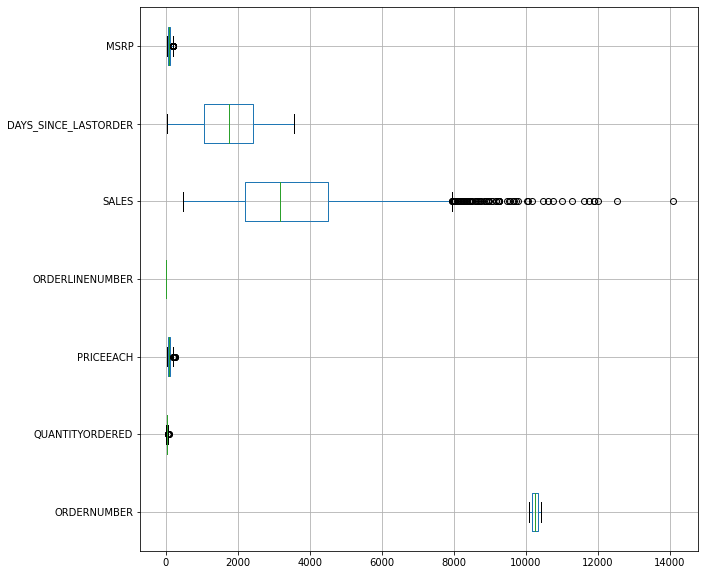

In [15]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

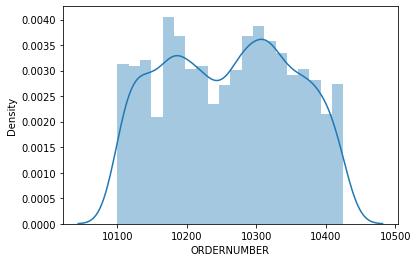

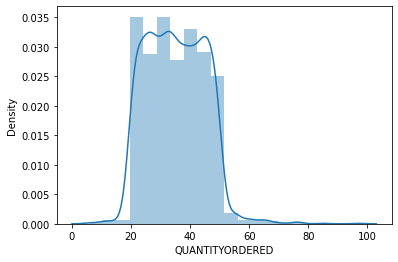

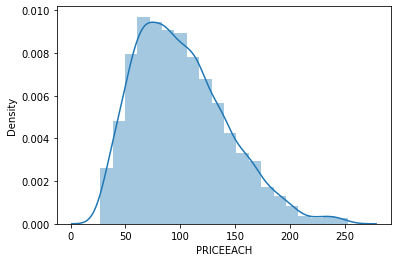

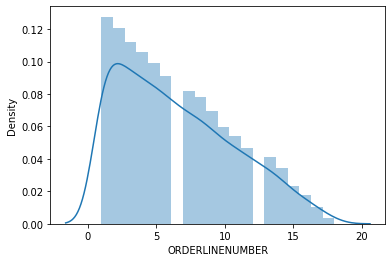

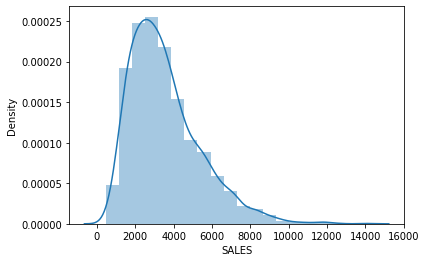

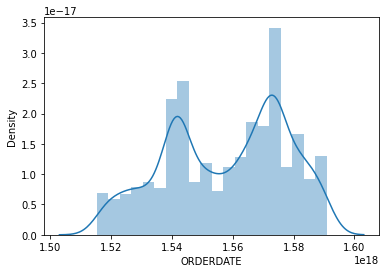

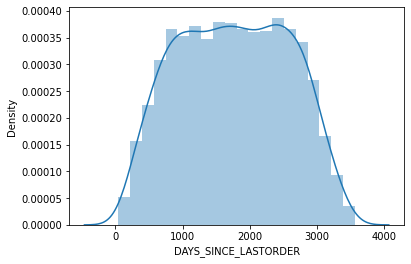

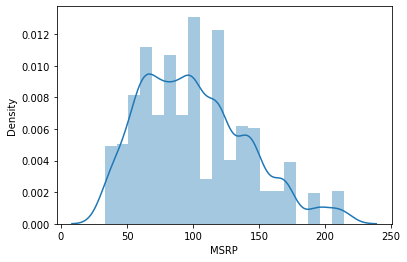

In [14]:
for column in df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
                  'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'MSRP']]: 

    sns.distplot(df[column],bins=20)
    plt.show()

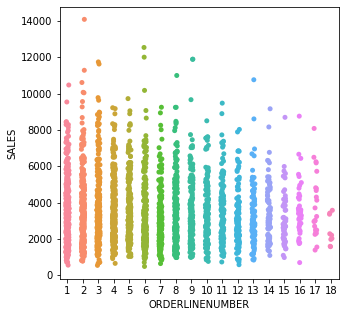

In [17]:
plt.figure(figsize=(5,5))
sns.stripplot(df["ORDERLINENUMBER"], df['SALES'], jitter=True) 
plt.show()

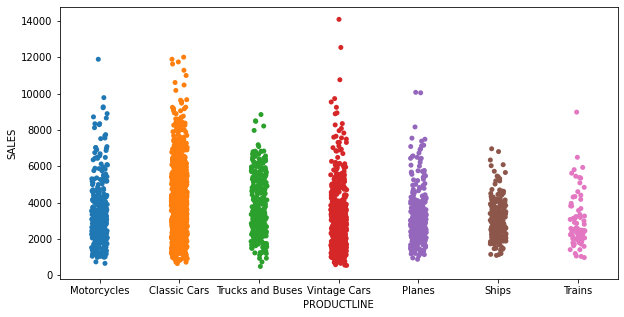

In [26]:
plt.figure(figsize=(10,5))
sns.stripplot(df["PRODUCTLINE"], df['SALES'], jitter=True) 
plt.show()

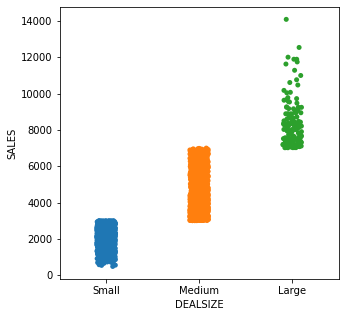

In [25]:
plt.figure(figsize=(5,5))
sns.stripplot(df["DEALSIZE"], df['SALES'], jitter=True) 
plt.show()

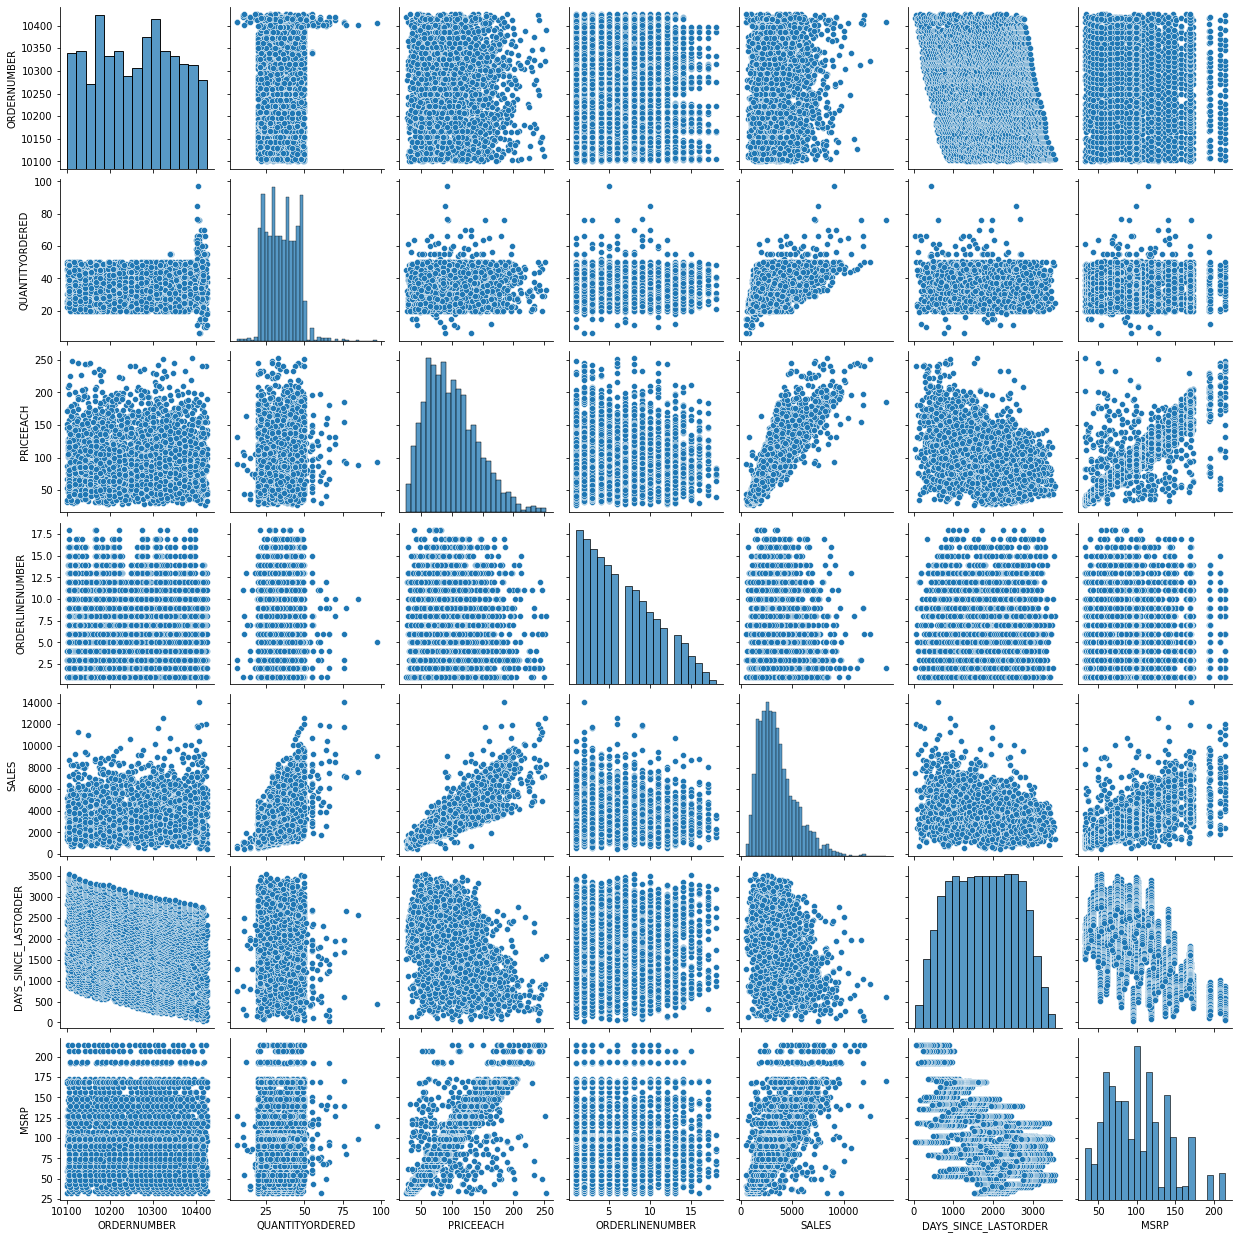

In [34]:
sns.pairplot(df)

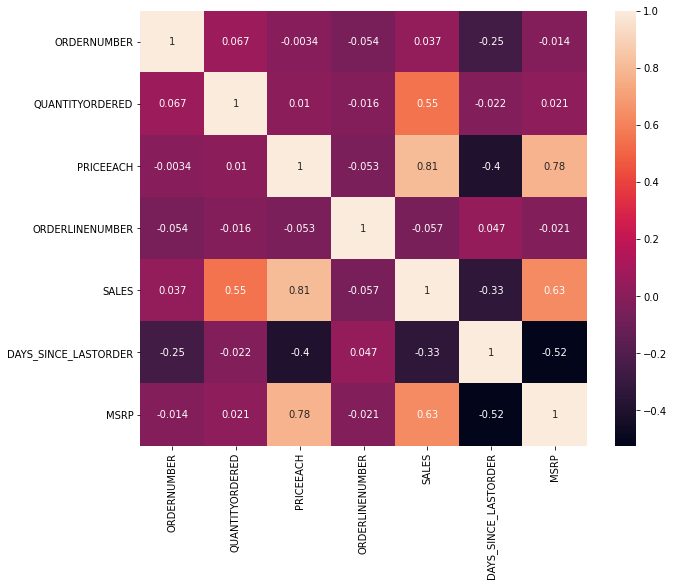

In [35]:
#Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


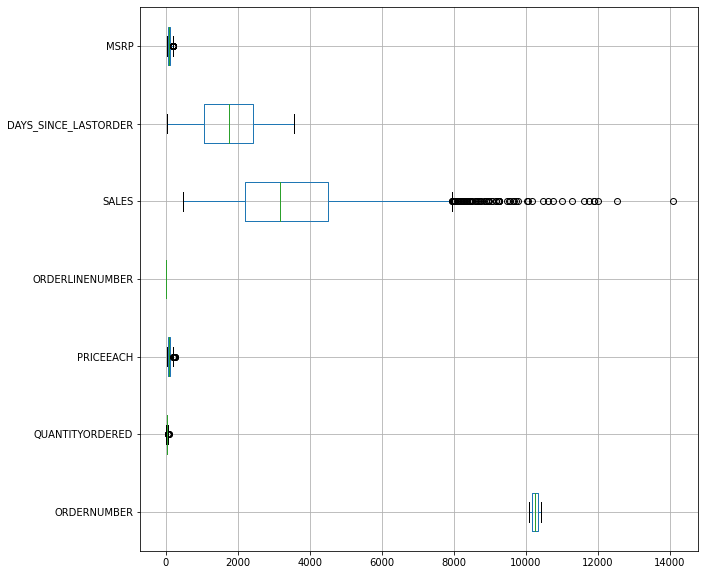

In [36]:
#Checking Outliers
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [38]:
def find_whiskers(col):
    sorted(col)
    Q1 , Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range , upper_range

for col in ['QUANTITYORDERED', 'ORDERNUMBER','PRICEEACH','ORDERLINENUMBER','PRICEEACH','MSRP','DAYS_SINCE_LASTORDER','SALES']:
    lwrange , uprange = find_whiskers(df[col])
    df[col] = np.where(df[col] > uprange , uprange , df[col])
    df[col] = np.where(df[col] < lwrange , lwrange , df[col])

<AxesSubplot:>

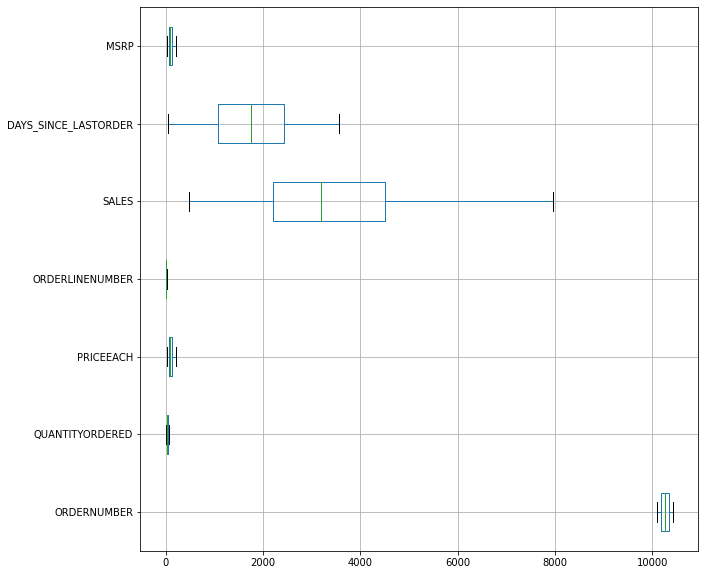

In [39]:
#Boxplot after outlier treatment

plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

In [3]:
data = pd.read_excel("MRA_1_Output.xlsx")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CONTACTFIRSTNAME,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Monetary_HML,Frequency_HML,Recency_HML
0,10100,22,86.51,4,1903.22,2018-01-06,2096,Shipped,Vintage Cars,92,...,Valarie,Small,1903.22,1205,Bin 1,Bin 1,Bin 3,L,NaN,L
1,10100,30,171.70,3,5151.00,2018-01-06,1429,Shipped,Vintage Cars,170,...,Valarie,Medium,5151.00,1205,Bin 1,Bin 3,Bin 3,H,NaN,L
2,10100,49,34.47,1,1689.03,2018-01-06,2836,Shipped,Vintage Cars,41,...,Valarie,Small,1689.03,1205,Bin 1,Bin 1,Bin 3,L,NaN,L
3,10100,50,67.80,2,3390.00,2018-01-06,1529,Shipped,Vintage Cars,60,...,Valarie,Medium,3390.00,1205,Bin 1,Bin 2,Bin 3,M,NaN,L
4,10101,25,151.28,4,3782.00,2018-01-09,1573,Shipped,Vintage Cars,127,...,Roland,Medium,3782.00,1202,Bin 1,Bin 2,Bin 3,M,NaN,L


In [5]:
#Who are your best customers? (give at least 5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
#Which customers are on the verge of churning? (give at least 5)
data.head()

In [ ]:
Who are your lost customers? (give at least 5)


In [ ]:
Who are your loyal customers? (give at least 5)